# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments


Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
#indices = [52,372,435]
#indices = []
#indices = [131,154,355] # All Under 25%
#indices = [119,139,374] # 25% < Values < 50%
#indices = [139,139,374] # 50% < Values < 75%
#indices = [23,47,181] # 75% < Values < 100%
#indices = [184,238,405] # Values < mean
#indices = [47,165,211] # Values > mean


# Chosen indices
indices = [47,141,238]
#print indices



# Create a DataFrame of the chosen samples

# CODE FOR AUTOMATICALLY GENERATE THE WANTED INDICES BY RANGE
"""
indic = len(data)
indices_valides = []
i=0
while i < indic :
    #indices.append(i)
    line_indic = pd.DataFrame(data.loc[[i]], columns = data.keys()).reset_index(drop = True)
    Fresh=float(line_indic['Fresh'])
    Milk=float(line_indic['Milk'])
    Grocery=float(line_indic['Grocery'])
    Frozen=float(line_indic['Frozen'])
    Detergents_Paper=float(line_indic['Detergents_Paper'])
    Delicatessen=float(line_indic['Delicatessen'])
    
    mean = np.mean(data)
    
    # Under 25%
    #if Fresh < 3127.75 and Milk < 1533. and Grocery < 2153. and Frozen < 742.25 and Detergents_Paper < 256.75 and Delicatessen < 408.25:
    #25% < Values < 50%
    #if Fresh in np.arange(3127.75 , 8504.) and Milk in np.arange(1533. , 3627.) and Grocery in np.arange(2153. , 4755.5) and Frozen in np.arange(742.25 , 1526.) and Detergents_Paper in np.arange(256.75 , 816.5)  and Delicatessen in np.arange(408.25 , 965.5):
    # 50% < Values < 75%
    #if Fresh in np.arange(8504., 16933.75) and Milk in np.arange(3627., 7190.25) and Grocery in np.arange(4755.5, 10655.75) and Frozen in np.arange(1526., 3554.25) and Detergents_Paper in np.arange(816.5, 3922)  and Delicatessen in np.arange(965.5, 1820.25):
    # 75% < Values < 100%
    #if Fresh > 16933.75 and Milk > 7190.25 and Grocery > 10655.75 and Frozen > 3554.25 and Detergents_Paper > 3922  and Delicatessen > 1820.25:
    # Under the mean
    #if Fresh < float(np.mean(data['Fresh'])) and Milk < float(np.mean(data['Milk'])) and Grocery < float(np.mean(data['Grocery'])) and Frozen < float(np.mean(data['Frozen'])) and Detergents_Paper < float(np.mean(data['Detergents_Paper'])) and Delicatessen < float(np.mean(data['Delicatessen'])):
    if Fresh > float(np.mean(data['Fresh'])) and Milk > float(np.mean(data['Milk'])) and Grocery > float(np.mean(data['Grocery'])) and Frozen > float(np.mean(data['Frozen'])) and Detergents_Paper > float(np.mean(data['Detergents_Paper'])) and Delicatessen > float(np.mean(data['Delicatessen'])):
        indices_valides.append(i)
    
    
    i=i+1
print "indices_valides ", indices_valides

"""


samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)    
print "Chosen samples of wholesale customers dataset : "
display(samples)
print " Sample - Data mean : "
display(samples - np.round(data.mean()))
print " Sample - Data median : "
display(samples - np.round(data.median()))
print " Average gap between Mean and Median for the whole data : "
display(np.mean(np.round(data.mean()) - np.round(data.median())))

#print " Quartile - Data Quartile : "
#feature='Fresh'
#Q1 = np.percentile(samples[feature], 25)
#Q3 = np.percentile(samples[feature], 75)
#step = 1.5*(Q3-Q1)
#display(samples[~((samples[feature] >= Q1 - step) & (samples[feature] <= Q3 + step))])
#




##client_data = [4213.0, 8224.0, 12518.0, 904.0, 4741.0, 1099.0] # Client 1
               
#print " ++++ GENERATED DATA ++++ Predicted establishment ++++ "
#client_data = [[4213.0, 8224.0, 12518.0, 904.0, 4741.0, 1099.0], # Client 1
#               [9347.0, 1973.0, 2543.0, 2205.0, 345.0, 755.0]]  # Client 2
#client_data = pd.DataFrame(client_data, columns = data.keys())


#print " Data : "
#display(client_data)
#print " Data - Data mean : "
#display(client_data - np.round(data.mean()))
#print " Data - Data median : "
#display(client_data - np.round(data.median()))



Chosen samples of wholesale customers dataset : 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,44466,54259,55571,7782,24171,6465
1,30379,13252,5189,321,51,1450
2,7363,475,585,1112,72,216


 Sample - Data mean : 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,32466.0,48463.0,47620.0,4710.0,21290.0,4940.0
1,18379.0,7456.0,-2762.0,-2751.0,-2830.0,-75.0
2,-4637.0,-5321.0,-7366.0,-1960.0,-2809.0,-1309.0


 Sample - Data median : 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,35962.0,50632.0,50815.0,6256.0,23355.0,5499.0
1,21875.0,9625.0,433.0,-1205.0,-765.0,484.0
2,-1141.0,-3152.0,-4171.0,-414.0,-744.0,-750.0


 Average gap between Mean and Median for the whole data : 


2171.6666666666665

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
- Globally I have choosen indices regarding how each feature value of the line is away or not from their corresponding mean value. So in my sample I have indices in the two first quartiles of the data and one indice in the fourth quartile range. The mean is in the third quartile range.
- The first sample is included in the fourth quartile range and should represents **"Retailers"**. Indeed, we have a high value for each feature compared to their corresponding mean value, and their median values are also in a good range as they are closer to the sample values. So we could say that the values are representatives. In conclusion, the fact to have a high value of each category gives the intuition of retailers. They buy to resell to their clients.
- For the second sample I guess that it represents **"cafes"**. We see that the amount per category is generally under the mean value of each feature, apart the Fresh and Milk feature. The implied establishments could include coffee shop, tea room, restaurant, cafeteria, coffee bar, coffee house, etc. They are the mean buyers.
- The third sample represents **"Markets"** because all the features values are far away under their mean value for the whole distribution. This kind of customers doesn't necessarily buy a high amount of each product. We could also include here occasionnally buyers.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
fresh_prod = data['Fresh']
new_data = data.drop('Fresh', axis = 1) #None

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, fresh_prod, test_size=0.25, random_state=42) 

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42) #None
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)#None
print "Prediction score : ", score


Prediction score :  -0.385749710204


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
- I attempt to predict the 'Fresh' product
- The prediction score is : **-0.385749710204** (A negative value)
- As we have a negative value for the score I could say that the 'Fresh' feature has a very low correlation (or no correlation) with other features, so it is actually good for identifying customers' spending habits. Indeed, when we have a high correlation with other features (high r^2 score) we can't determine with precision the impact of the chosen feature on the customers behaviour, because they also buy other type of product. And so we can't independently analyze each feature.
In conclusion, in our case the 'Fresh' feature is necessary for identifying customers' spending habits because it could be independently analyzed to identify the customers specific behaviour just from the one feature.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

Numerical correlaton with the corr() function : 


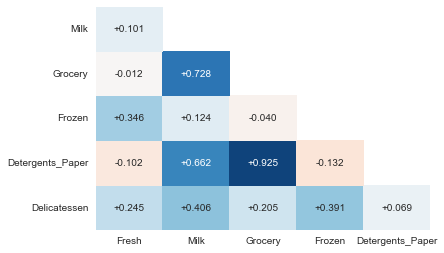

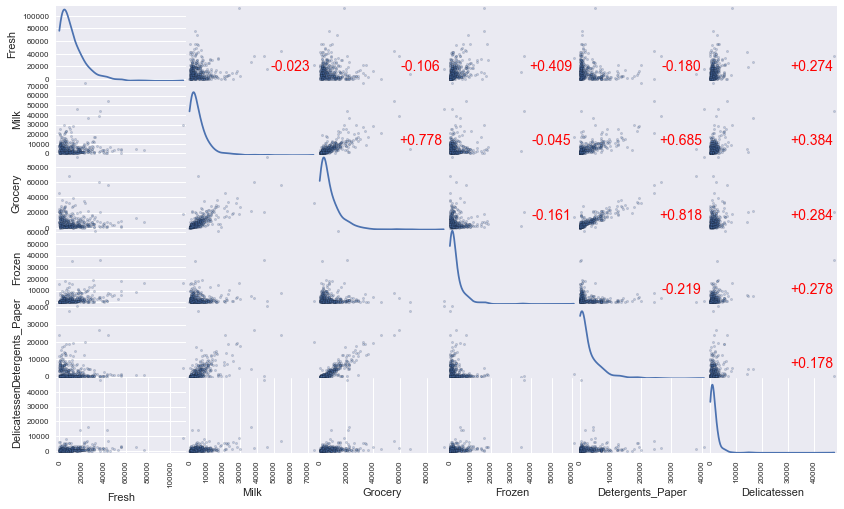

In [28]:
# print data.corr()
corr = data.corr()

# remove first row and last column for a cleaner look
corr.drop(['Fresh'], axis=0, inplace=True)
corr.drop(['Delicatessen'], axis=1, inplace=True)

# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

# plot the heatmap
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', fmt='+.3f', cbar=False)
    

# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
print "Numerical correlaton with the corr() function : "


# Is it possible to print correlation values (the same as from seaborn) directly on the plot using boxcox or another tool ?
# This is just a display of boxcox on the plot
from scipy.stats import boxcox
# transform the data
bc_df = data.copy()
for col in bc_df.columns:
    bc_df[col], _ = boxcox(bc_df[col])

corr = bc_df.corr().as_matrix()


# add the correlation values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%+.3f" %corr[i,j], (0.8, 0.2), xycoords='axes fraction', ha='center', 
                        va='center',color="red", fontsize=14)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
- The scatter matrix shows some degree of correlation between these following pairs of features. Using the corr() function I can determine their numerical correlation :

  - *Low correlation : r^2 score under or equal to 0.3 *
    - Fresh and Milk (0.1) 
    - Fresh and Frozen (0.346) 
    - Fresh and Delicatessen (0.244) 
    - Milk and Frozen (0.124) 
    - Grocery and Delicatessen (0.205) 
    - Detergents paper and Delicatessen (0.069) 
  - *Mean correlation : r^2 score between 0.4 and 0.6 *
    - Milk and Detergents paper (0.661) 
    - Milk and Delicatessen (0.406) 
    - Frozen and Delicatessen (0.39) 
  - *High correlation : r^2 score over or equal to 0.7 *
    - Milk and Grocery (0.728) 
    - Grocery and Detergents paper (0.924) 
  - *There is no correlation between all other pairs of features : r^2 score is negative *
- This confirm my suspicions about the relevance of the 'Fresh' feature. Indeed, as we could see there is always a negative or low prediction score between the 'Fresh' feature and all others (low or no correlation between them). So it could be independently analyzed to identify the customers specific behaviour just from the one feature.
- The most data concentration is under the amount of 20000. But we have not a symetric distribution of the data. There is a gap between the mean and median values for each feature (the average gap value for the whole data is 2171.6 (it is significant); see the display for the sample data above). And as we could see on the curve of each feature with the scatter matrix, we have a right skewed (positive skewness) distribution (mean > median). So the data is not normally distributed as the mean and median vary significantly for each feature (indicating a large skew).

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

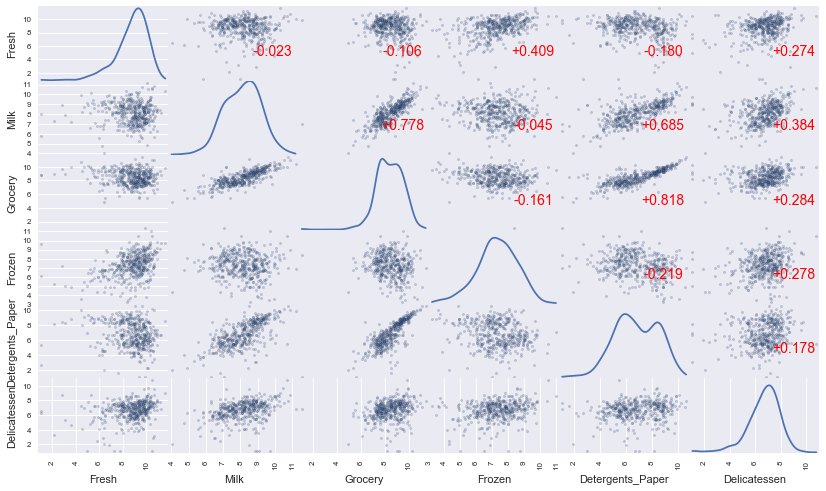

In [29]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)#None

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)#None

# Produce a scatter matrix for each pair of newly-transformed features
axes = pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

from scipy.stats import boxcox
# transform the data
bc_df = data.copy()
for col in bc_df.columns:
    bc_df[col], _ = boxcox(bc_df[col])

corr = bc_df.corr().as_matrix()


# add the correlation values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%+.3f" %corr[i,j], (0.8, 0.4), xycoords='axes fraction', ha='center', 
                        va='center',color="red", fontsize=14)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [30]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
1,10.321507,9.491904,8.554296,5.771441,3.931826,7.279319
2,8.904223,6.163315,6.371612,7.013915,4.276666,5.375278


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [34]:
# NORMAL DISTRIBUTION
# mean
#mean = np.mean(log_data)
# std
#std = np.std(log_data)
#print " x - 2std : ", mean - 2*std
#print " x + 2std : ", mean + 2*std



# For each feature find the data points with extreme high or low values
#print "log_data : \n",log_data
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25) #None
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75) #None
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)#None
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
#outliers  = [66, 75, 142, 154, 289, 338]
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


# Code for automatically display the outlier indices for two correlated features : feature1 and feature2
feature1='Grocery'
Q11 = np.percentile(log_data[feature1], 25) #None
Q31 = np.percentile(log_data[feature1], 75) #None
step1 = 1.5*(Q31-Q11)#None

feature2='Detergents_Paper'
Q12 = np.percentile(log_data[feature2], 25) #None
Q32 = np.percentile(log_data[feature2], 75) #None
step2 = 1.5*(Q32-Q12)#None

data1=log_data[~((log_data[feature1] >= Q11 - step1) & (log_data[feature1] <= Q31 + step1))]
data2=log_data[~((log_data[feature2] >= Q12 - step2) & (log_data[feature2] <= Q32 + step2))]

#print "data1", data1.index
outliers_indices = []
indices_data1 = list(data1.index.values)
indices_data2 = list(data2.index.values)
print "indices_data1 - {} : {}".format(feature1, indices_data1) 
print "indices_data2 - {} : {}".format(feature2, indices_data2) 


for elt in indices_data1:
    if elt in indices_data2:
        outliers_indices.append(elt)

print "Outliers indices for {} --> {} : {}".format(feature1, feature2, outliers_indices) 

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


indices_data1 - Grocery : [75, 154]
indices_data2 - Detergents_Paper : [75, 161]
Outliers indices for Grocery --> Detergents_Paper : [75]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
- Yes, there are some data points considered outliers for more than one feature based on the definition above (statistical outliers).
- I think some of the data points targeted as outliers need to be removed on basis of the correlation between pairs of features. If a data point considered as outlier is in two correlated features it has to be removed, because its presence could skew the importance of the correlation between the pair of features (low or high correlation). So we will have to remove each indice which appears as an outlier indice in two correlated features (as shown above I used a personal code to automatically display them).
  - Fresh and Milk : [none]
  - Fresh and Frozen : [65]
  - Fresh and Delicatessen : [66, 128] 
  - Milk and Frozen : [none]
  - Grocery and Delicatessen : [154] 
  - Detergents paper and Delicatessen : [none]
  - Milk and Detergents paper : [none]
  - Milk and Delicatessen : [154]
  - Frozen and Delicatessen : [none]
  - Milk and Grocery : [154] 
  - Grocery and Detergents paper : [75]
- In conclusion we get this outliers list : outliers  = [65, 66, 75, 128, 154]

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


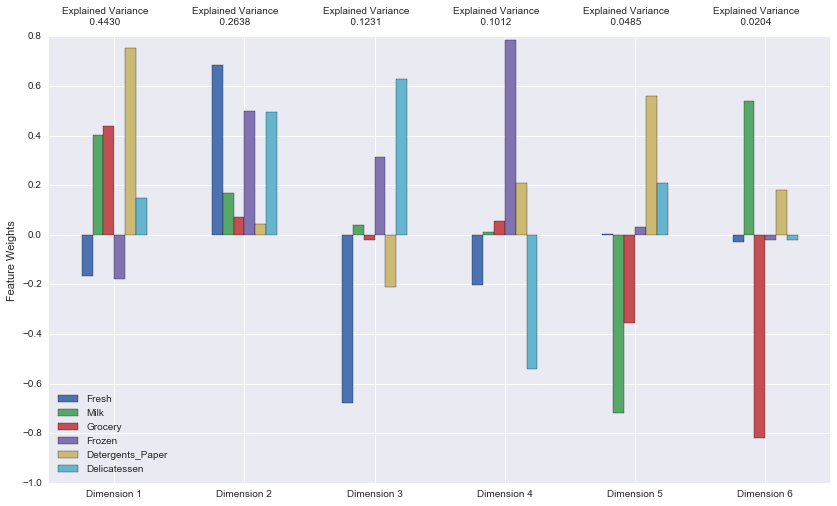

In [37]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6) #None
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)#None

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

print pca_results['Explained Variance'].cumsum()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
- The first and second principal component explain in total a variance of **0.7068** in the data.
- The first four principal component explain in total a variance of **0.9311** in the data.
- Description of the first four principal component (PCA1, PCA2, PCA3 and PCA4) :
  - **PCA1 :** With an explained variance of 0.4430 this component is mainly dominated by a large positive weights in Detergents_Paper (closer to 0.8). It also has a lower but mean positive weights on Grocery and Milk (between 0.4 and 0.5). It also correlates with a low negative-weighted decrease in Fresh and Frozen features. **This pattern might represent spending in household staples products that are purchased together.** The first component shows that we have a lot of variance in customers who purchase Milk, Grocery and Detergents_Paper. Customers with high values in the first component purchase a lot of these 3 categories, while those with low values in the component purchase very little quantity of them.

  - **PCA2 :** The second principal component increases significantly in positive-weighted Fresh, Frozen and Delicatessen which have all their value over 0.5. It has none negative-weighted feature but a low positive-weighted decrease in Milk, Grocery and Detergents Paper features. **This component can be viewed as a measure of customers who buy feeding products together.** 
The second component shows that we have a lot of variance in customers who purchase Fresh, Frozen and Delicatessen. So, customers with high values in the second component purchase a lot of these 3 categories, while those with low values in this component purchase very little quantity of them.

  - **PCA3 :** The third principal component increases more significantly in positive-weighted Delicatessen (over 0.6) and in negative-weighted Fresh (closer to -0.7). It also correlates with a low positive-weighted decrease in Frozen (0.3) and a low negative-weighted decrease in Detergent Paper (-0.2). **So, this pattern might represent spending in Delicatessen or Fresh products (which are feeding products too).** The third component shows that we have a lot of variance in customers who purchase either Delicatessen or Fresh. Customers with high values in the third component purchase a lot of one of these 2 categories, while those with low values in this component purchase very little quantity of them.

  - **PCA4 :** The fourth principal component increases more significantly in positive-weighted Frozen (very closer to 0.8) and in negative-weighted Delicatessen (closer to -0.6). Other products have a very low absolute feature weights value (up to about 0.2). **So, this pattern might represent spending in Frozen or Delicatessen products (which also are feeding products).** The fourth component shows that we have a lot of variance in customers who purchase either Frozen or Delicatessen. So, customers with high values in the fourth component purchase a lot of one of these 2 categories, while those with low values in this component purchase very little quantity of them.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [38]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,4.3646,3.9519,-0.1229,0.6240,-0.5379,-0.0551
1,-1.4618,0.6911,-0.5149,-2.4331,-2.5394,0.1115
2,-3.7646,-1.2964,-0.5244,-0.2269,0.4619,0.2207


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [39]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2) #None
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)#None

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)#None

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [40]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,4.3646,3.9519
1,-1.4618,0.6911
2,-3.7646,-1.2964


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
- The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia (internal coherence of clusters measurement) : lower values are better and zero is optimal.
Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate inertia inflation and speed up the computations. This algorithm support scalability with very large number of sample and could be used for general-purpose, even cluster size, flat geometry and not too many clusters.
- A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.
It concerns both the covariance type and the number of components in the model. It is not scalable but it is good for density estimation and can be used for flat geometry. 
Another advantage is that it is the fastest algorithm for learning mixture models.
- Finally I choose to use the KMeans algorithm for its speed and structure (and also because I can use it in combinaison with PCA implementation above to produce better results) :
  - Speed :
    - K-Means is much faster and much more scalable
    - GMM is slower since it has to incorporate information about the distributions of data, thus it has to deal with the co-variance, mean, variance, and prior probalilities of the data, and also has to assign probabilities to belonging to each clusters.
  - Structure :
    - K-Means straight boundaries (hard clustering)
    - GMM gives much more structural information. Since it works on probabilities (soft clustering), it allow the measure of how wide is each cluster.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [41]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=2, random_state=42) #None
#clusterer = KMeans(n_clusters=5, init='k-means++', n_init=100, max_iter=1, precompute_distances=True) #None
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data) #None

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_ #None

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples) #None

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn import metrics
score = metrics.silhouette_score(reduced_data, preds) #None
print "silhouette_score : ", score

silhouette_score :  0.426281015469


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
  - Silhouette score for **2 clusters** : **0.426281015469**
  - Silhouette score for **3 clusters** : **0.39689092645**
  - Silhouette score for **4 clusters** : **0.331841276009**
  - Silhouette score for **5 clusters** : **0.349997797526**
  - Silhouette score for **6 clusters** : **0.365885220633**
  - The best Silhouette score is provided by 2 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

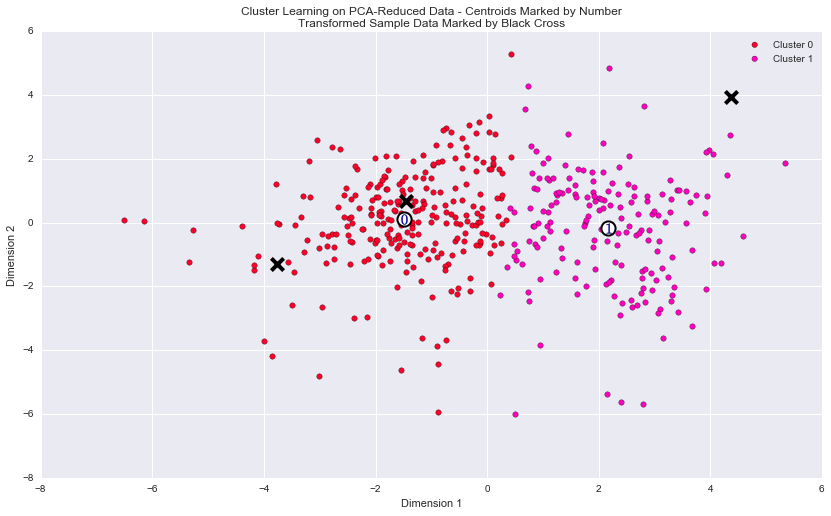

In [42]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


True centers for the wholesale customers dataset : 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


True centers - Data mean : 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3133.0,-3899.0,-5474.0,-984.0,-2587.0,-844.0
Segment 1,-7995.0,2104.0,4153.0,-2120.0,1680.0,-489.0
50%,-3496.0,-2169.0,-3195.5,-1546.0,-2064.5,-559.5


True centers - Data median : 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,363.0,-1730.0,-2279.0,562.0,-522.0,-285.0
Segment 1,-4499.0,4273.0,7348.0,-574.0,3745.0,70.0
50%,0.0,0.0,-0.5,0.0,0.5,-0.5


Average gap between Mean and Median for the whole data : 


2171.6666666666665

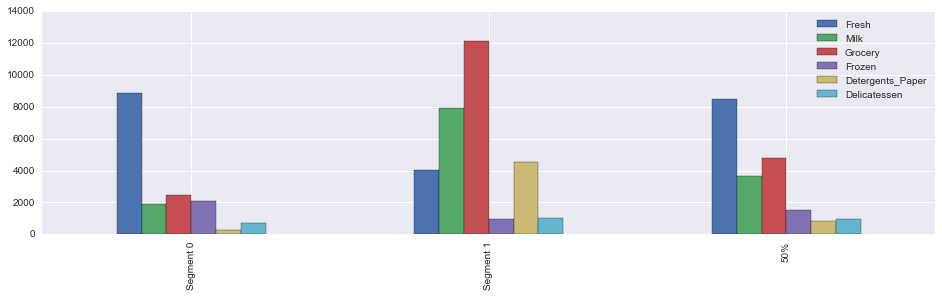

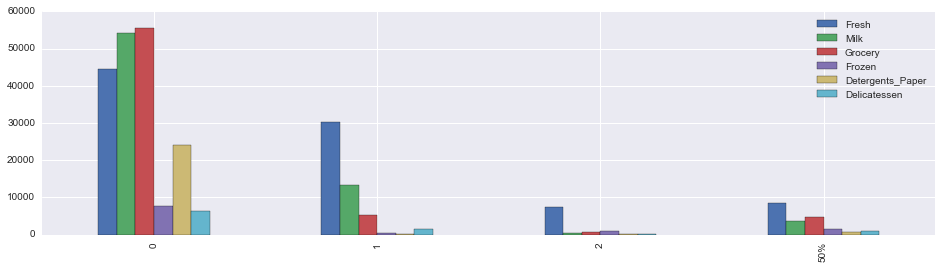

In [43]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers) #None

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers) #None

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print "True centers for the wholesale customers dataset : "
display(true_centers)

# These plots could be helpful to easily see how the samples data mimic the true centers
# Plot for the true centers
true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

# Plot for the samples data (samples points 0, 1 and 2)
samples = samples.append(data.describe().ix['50%'])
samples.plot(kind = 'bar', figsize = (16, 4))

# Applying mean and median on the true centers for more visibility of the data distribution
print "True centers - Data mean : "
display(true_centers - np.round(data.mean()))
print "True centers - Data median : "
display(true_centers - np.round(data.median()))
print "Average gap between Mean and Median for the whole data : "
display(np.mean(np.round(data.mean()) - np.round(data.median())))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
As my intuition was based on the amount of product by category and their position according to the mean and median, I think :
- We could see that for the Segment 0 all the amount are under the mean value per category and also under the median apart the Fresh and Frozen which overpass slightly the median (respectively 363.0 and 562.0). So ***the Segment 0 represents 'Cafes-Markets'***.
- But for Segment 1 we see the opposite position for the amount of product by category. Apart the Fresh category, all others are over or very closer the mean value by category. These amount are also all over the median value per category apart the Fresh and Frozen (slightly under). And considering the gap between the mean and median (with an average of 2171.67) we could easily say that the segment 1 is over the mean value. So ***the Segment 1 should represent 'Retailers'***.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [44]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**
- Sample point 0 best represents the Segment 1 (Retailers)
- Sample point 1 best represents the Segment 0 (Cafes-Markets)
- Sample point 2 best represents the Segment 0 (Cafes-Markets)
- For the sample point 0, the total purchase cost of each product category is always over the mean value per category of product. And we could also see that the amount of each of these categories mimic those of the Cluster 1 (Segment1), when we move from one category to another (from Fresh to Delicatessen). So we could say that ***the prediction for the sample point 0 is consistent with the Segment 1.***
- For the sample point 1, the amount per category is generally under the mean value of each feature, apart the Fresh and Milk feature which mimic the Fresh and Milk feature of the Cluster 0 (Segment 0). We also see that for the Segment 0 all the amount are under the mean value per category.  So we could say that ***the prediction for the sample point 1 is consistent with the Segment 0.*** 
- For the sample point 2, all the features values are far away under their mean value for the whole distribution, and the Fresh and Milk feature also mimic the Fresh and Milk feature of the Cluster 0 (Segment 0). We also see that for the Segment 0 all the amount are under the mean value per category.  So we could say that ***the prediction for the sample point 2 is consistent with the Segment 0.*** 

## Conclusion

### Question 10
Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether that change affects its customers positively or negatively. The wholesale distributor wants to consider changing its delivery service from 5 days a week to 3 days a week, but will only do so if it affects their customers positively. *How would you use the customer segments you found above to perform an A/B test for this change?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
To perform an A/B test for this change, we should define two variants of survey emails(A and B) with differents caracteristics and apply them to the segments. The test I propose consist in sending survey emails to a sample of customers according to their Segment and analysing their responses. Then, we should generalize it to all the customers if it works.
- **Email test** : Send 1000 emails to customers from segment 0 (500 with variant A and 500 with variant B) and 1000 emails to customers from segment 1 (500 with variant A and 500 with variant B). The variant A give to the customer the possibility to propose a number of day. And the second variant (variant B) tries to know if the number of day we decide ourselves (3 days) suits to the customer.
  - Variant A : "We plan to reduce the delivery service number of days per week, only if this meets your needs. How many days do you wish ?". The positive responses will be the numbers less or equal to 3.
  - Variant B : "We pass from 5 days a week to 3 days a week, for the delivery service. Does this suits to your needs ?". The positive responses will be YES.
  - Then, from the result we should make a percentage of positive responses by segment and take the best decision. Indeed, customers from the same segment should have the same needs. The group with the highest percentage should be the most positively affected by the change, and should be generalized to all the segment's customers. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a segment it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and has made estimates for each customer's annual spending of the six product categories. Knowing these estimates, the wholesale distributor wants to classify each new customer to one of the customer segments to determine the most appropriate delivery service.  
*Describe a supervised learning strategy you could use to make classification predictions for the ten new customers.*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**
This is a classification problem. As we have an estimation for each customer's annual spending of the six product categories, we could **define a new dataset with the old data**, including **'customer segment' as new feature**. The features of this new dataset will be the old data, and the target variable will be the 'customer segment'. So we will have two classes ('Segment 0' and 'Segment 1') in the 'customer segment'. Then, we could apply a supervised learning algorithm such as SVM or Decision Tree to predict the new customer's segment.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

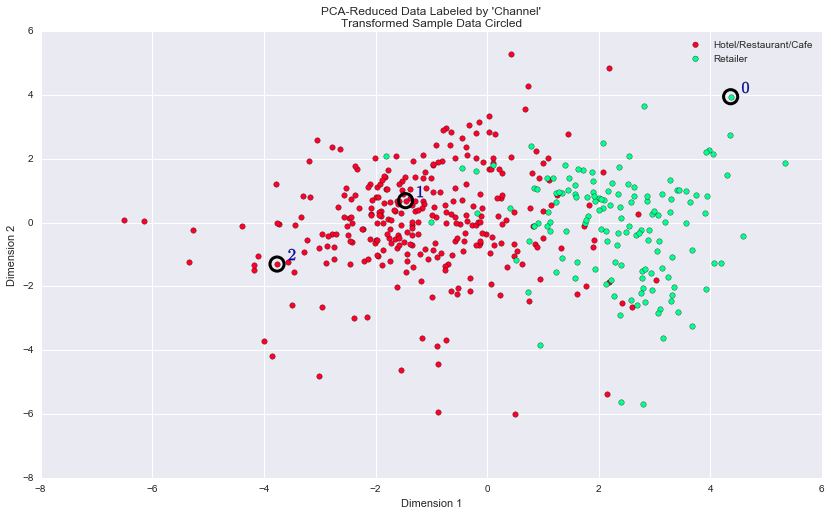

In [45]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
- This underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers also shows two clusters like the clustering algorithm. But here as we can see, there is not a strict separation of the points. We find some red points between the green side and vice versa.
- Segment 1 is assimilable to 'Retailer' and Segment 0 to 'Hotel/Restaurant/Cafe'. But no segment could be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution because of the mixture of some points.
- These classifications contain just some skewed points in comparison to the previous definition of the customer segments. All other points are corrects. So I can consider them as consistent with my previous definition of the customer segments.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.